In [ ]:
import pandas as pd

In [ ]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 0 ... 0 2 0]


In [ ]:
print(modelo.cluster_centers_)

[[ 0.0317986  -0.17221517 -0.09609698 -0.25282145 -0.27045122  0.183437
  -0.27808305  0.11306209  0.07053001 -0.08885492 -0.08989352 -0.11613781
  -0.05843697  0.01018049 -0.22047572  0.16322315 -0.07526955 -0.48687277
   0.07115097  0.04056819]
 [-0.05917995  0.45087365 -0.10765877 -0.2333134  -0.26719745 -0.55963096
   0.84717995 -0.21354076  0.05127256 -0.12248588  0.27115761  0.4108626
   0.02091406 -0.17489929  0.62305687 -0.31634824  0.14400667  1.45127272
  -0.11752555 -0.07204999]
 [-0.05917995 -0.00864732  0.90222182  2.24759932  2.4488033   0.20962694
  -0.31476151 -0.20253474 -0.59213503  0.89214979 -0.09492563 -0.27549544
   0.33054416  0.37480914 -0.12679203 -0.27202043  0.1301769  -0.47033271
  -0.17001952 -0.08421394]]


In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.031799,-0.172215,-0.096097,-0.252821,-0.270451,0.183437,-0.278083,0.113062,0.070530,-0.088855,-0.089894,-0.116138,-0.058437,0.010180,-0.220476,0.163223,-0.075270,-0.486873,0.071151,0.040568
1,-0.059180,0.450874,-0.107659,-0.233313,-0.267197,-0.559631,0.847180,-0.213541,0.051273,-0.122486,0.271158,0.410863,0.020914,-0.174899,0.623057,-0.316348,0.144007,1.451273,-0.117526,-0.072050
2,-0.059180,-0.008647,0.902222,2.247599,2.448803,0.209627,-0.314762,-0.202535,-0.592135,0.892150,-0.094926,-0.275495,0.330544,0.374809,-0.126792,-0.272020,0.130177,-0.470333,-0.170020,-0.084214


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8b28a9940>,
      dtype=object)

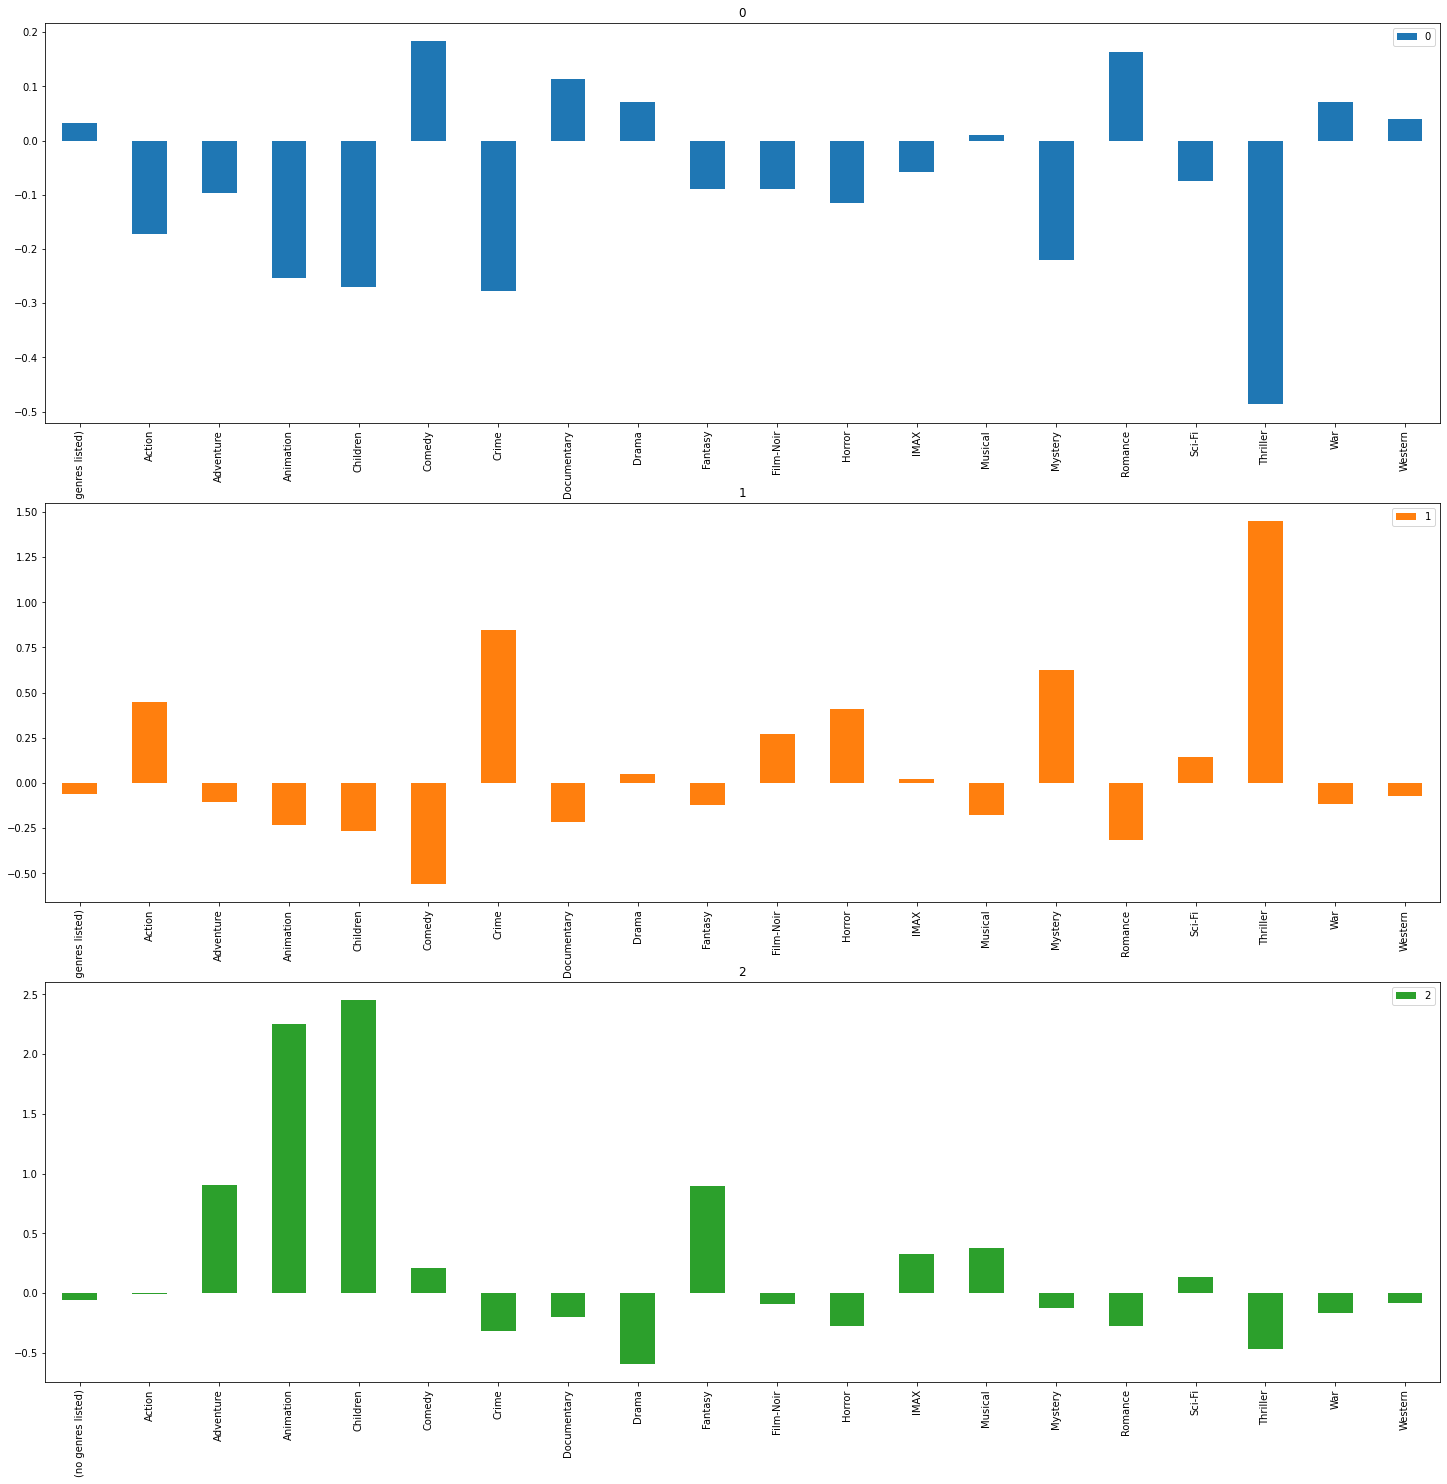

In [ ]:
grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 25),
                sharex=False)

In [ ]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9233,152658,Santa's Little Helper (2015),Children,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2803,3745,Titan A.E. (2000),Action|Adventure|Animation|Children|Sci-Fi,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8142,102007,"Invincible Iron Man, The (2007)",Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9561,173355,Travels of an Ant (1983),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9393,164200,Storks (2016),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6462,52462,Aqua Teen Hunger Force Colon Movie Film for Th...,Action|Adventure|Animation|Comedy|Fantasy|Myst...,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1706,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7501,83177,Yogi Bear (2010),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837,1099,"Christmas Carol, A (1938)",Children|Drama|Fantasy,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-33.06041  ,  56.45177  ],
       [ 44.998833 ,  32.59938  ],
       [-34.716335 , -33.928837 ],
       ...,
       [ 20.68785  ,   6.2454195],
       [-14.657225 ,  67.795074 ],
       [-16.927742 ,  -3.1827672]], dtype=float32)

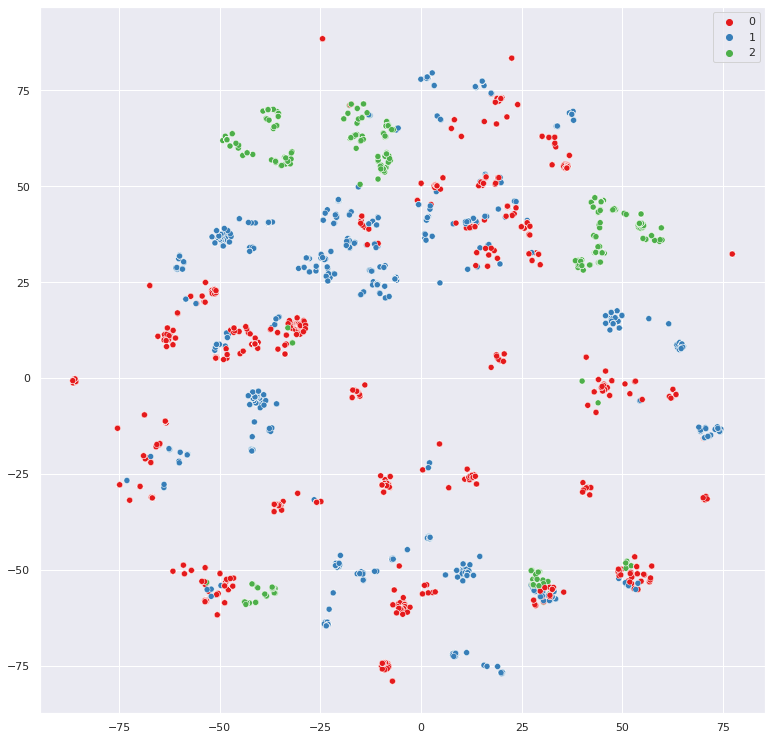

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8afa12b00>,
      dtype=object)

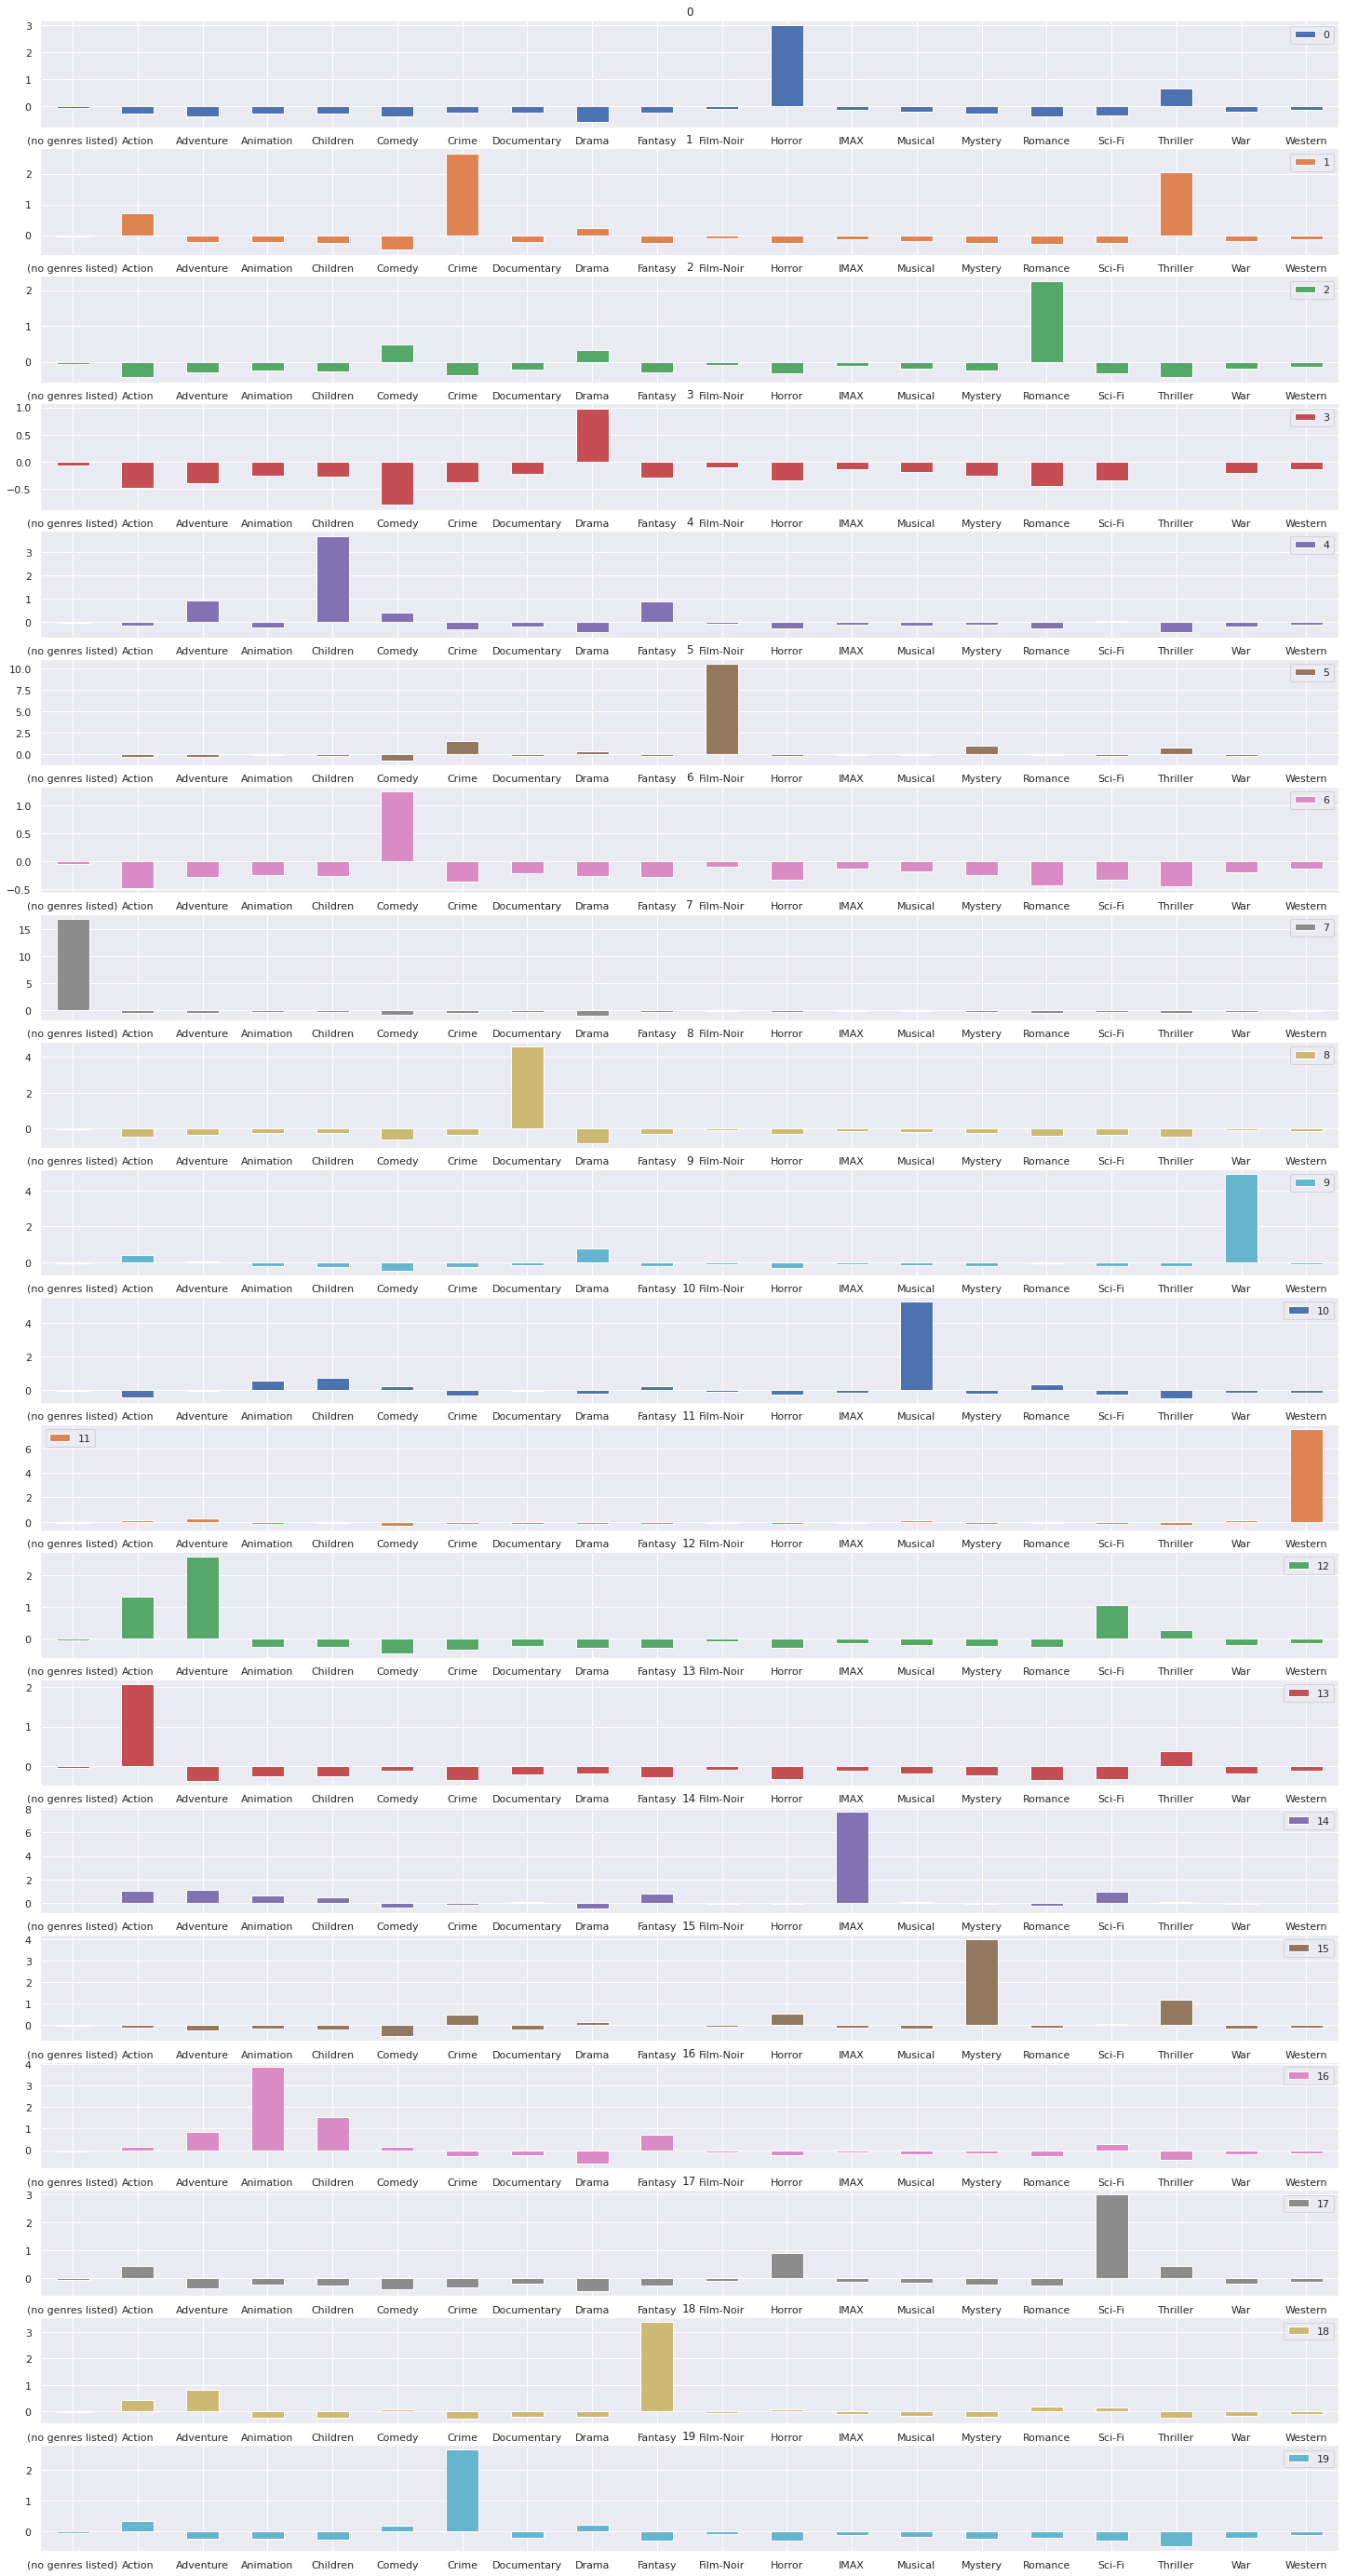

In [ ]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [ ]:
grupo = 4

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6359,49647,Charlotte's Web (2006),Children|Comedy|Drama|Fantasy,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3967,5591,Monkey Trouble (1994),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2503,3345,"Charlie, the Lonesome Cougar (1967)",Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
671,885,Bogus (1996),Children|Drama|Fantasy,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4235,6169,"Black Stallion Returns, The (1983)",Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5700,27790,Millions (2004),Children|Comedy|Crime|Drama|Fantasy,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
7252,74282,Anne of Green Gables: The Sequel (a.k.a. Anne ...,Children|Drama|Romance,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4483,6624,Agent Cody Banks (2003),Action|Adventure|Children|Fantasy,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2549,3412,"Bear, The (Ours, L') (1988)",Adventure|Children|Drama,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9238,153386,Long Live Ghosts! (1977),Children|Comedy|Fantasy,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans(20, generos_escalados)

[20, 55032.96986383254]

In [ ]:
kmeans(3, generos_escalados)

[3, 166185.30223986352]

In [ ]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 166159.35405607516],
 [4, 156997.81310615785],
 [5, 147218.0411219323],
 [6, 137541.03576826525],
 [7, 127387.40140665206],
 [8, 119050.88848659206],
 [9, 109945.08859829165],
 [10, 102249.03303098667],
 [11, 92304.60064907311],
 [12, 88233.6898588508],
 [13, 79509.10648958202],
 [14, 73426.86284544531],
 [15, 66892.9254930234],
 [16, 63298.019310926444],
 [17, 60409.216461195676],
 [18, 58884.92199654881],
 [19, 56816.56066556146],
 [20, 55244.73321828137],
 [21, 53982.73559970161],
 [22, 51129.061267140976],
 [23, 50693.56512280172],
 [24, 48839.11666167375],
 [25, 48398.14859764256],
 [26, 46868.62763309135],
 [27, 45998.63352865225],
 [28, 45400.857378924375],
 [29, 43123.28857794099],
 [30, 42266.429202100924],
 [31, 41291.84587738129],
 [32, 41379.83636734914],
 [33, 39608.1261290517],
 [34, 38819.97580664622],
 [35, 38872.33757607108],
 [36, 37195.64316440435],
 [37, 37393.71228281494],
 [38, 36036.793822456624],
 [39, 35900.1419584

In [ ]:
resultado = pd.DataFrame(resultado,
             columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,166159.354056
3,4,156997.813106
4,5,147218.041122
5,6,137541.035768
6,7,127387.401407
7,8,119050.888487
8,9,109945.088598
9,10,102249.033031


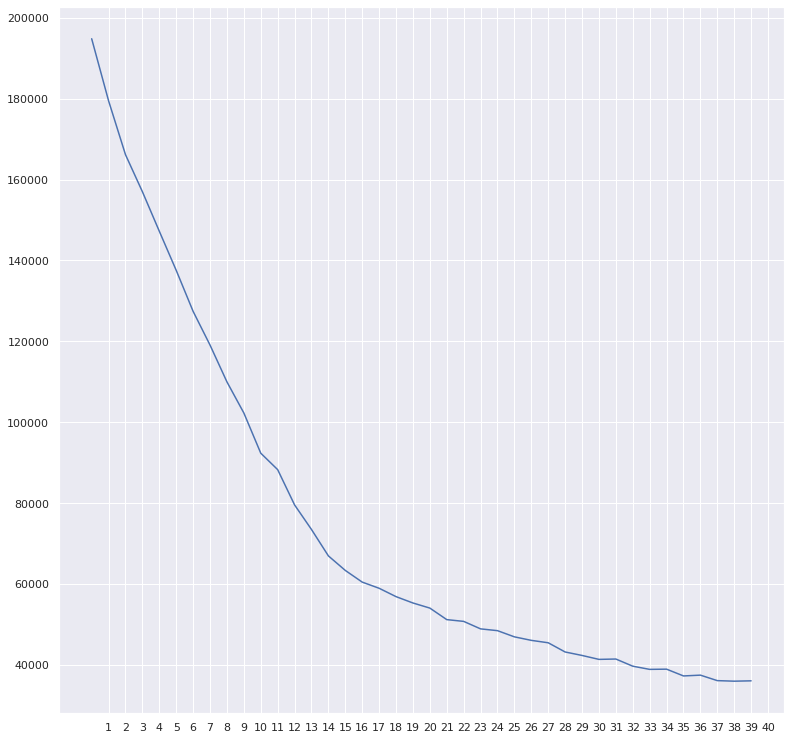

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8aeae5978>,
      dtype=object)

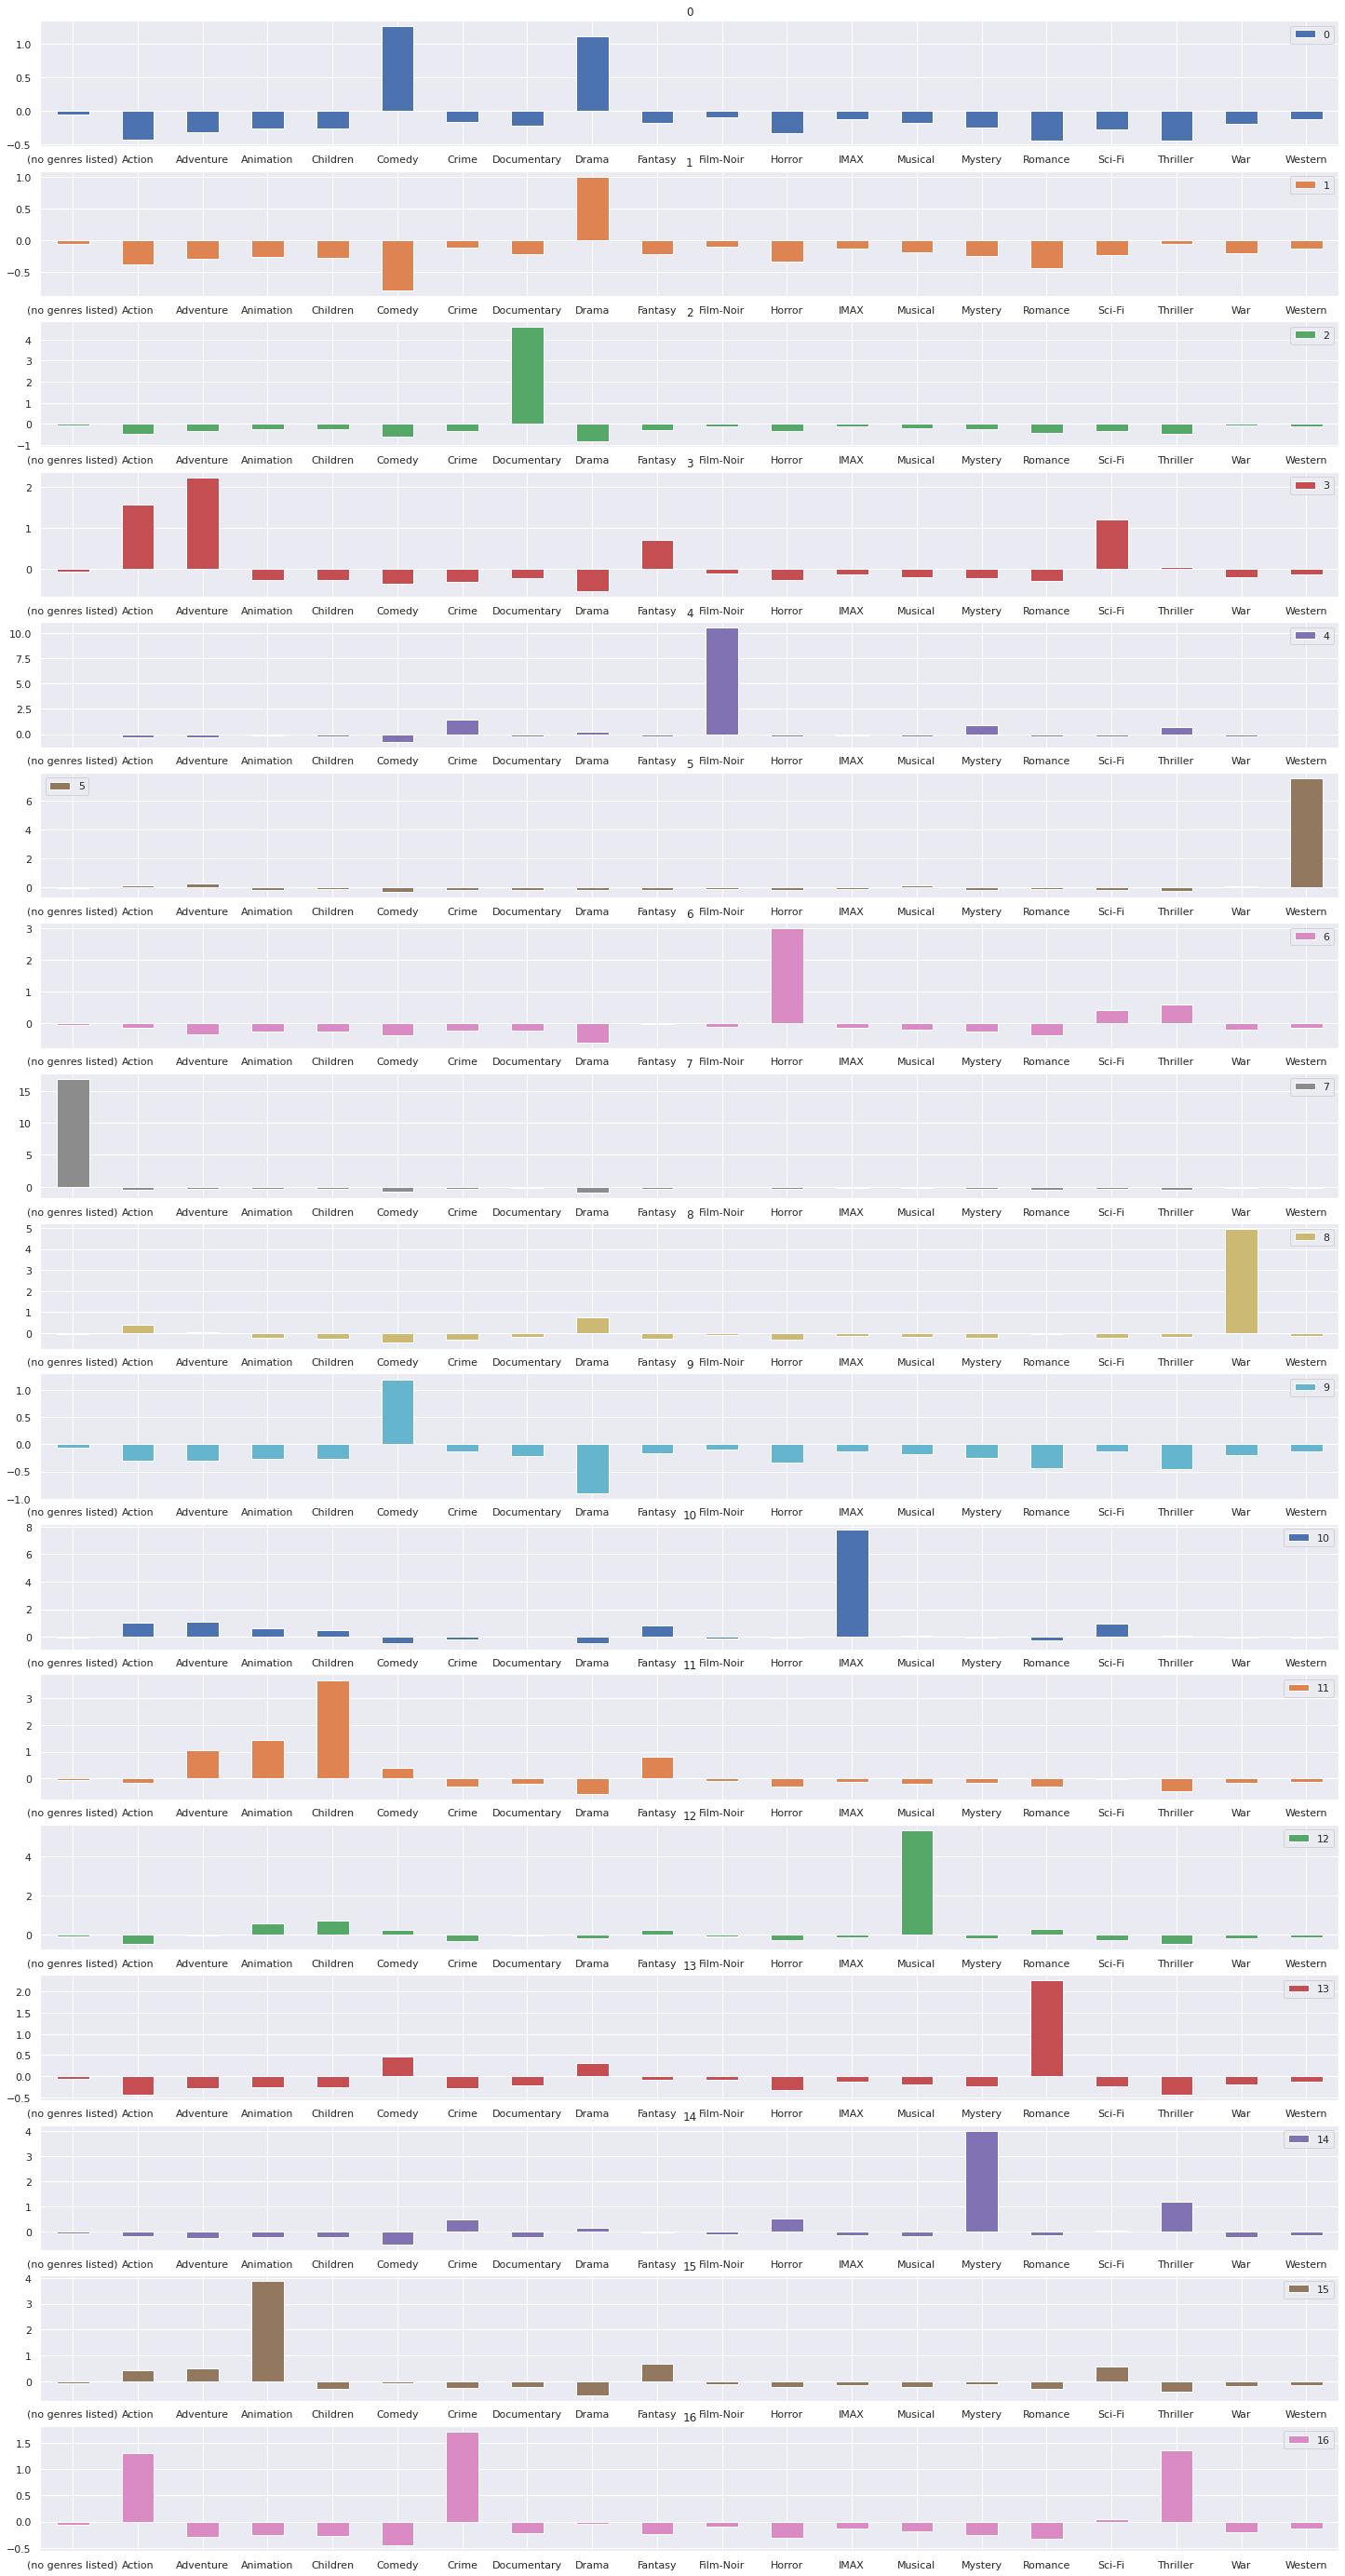

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [ ]:
grupo = 13

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4462,6587,Gigli (2003),Comedy|Crime|Romance,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6219,45672,Click (2006),Adventure|Comedy|Drama|Fantasy|Romance,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
5178,8383,Hope Springs (2003),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6362,49666,Fur: An Imaginary Portrait of Diane Arbus (2006),Drama|Fantasy|Romance,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4597,6837,Love Affair (1939),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7138,71327,Bright Star (2009),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2825,3774,House Party 2 (1991),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1918,2544,"School of Flesh, The (École de la chair, L') (...",Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3328,4505,For Keeps (1988),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3474,4740,Maybe Baby (2000),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 68.71591   ,   1.7751874 ],
       [ 37.409714  ,  27.834787  ],
       [-37.785225  ,  20.283659  ],
       ...,
       [ -9.2571125 ,  19.421988  ],
       [ 44.843098  ,   9.9079275 ],
       [ 18.043655  ,  -0.22184049]], dtype=float32)

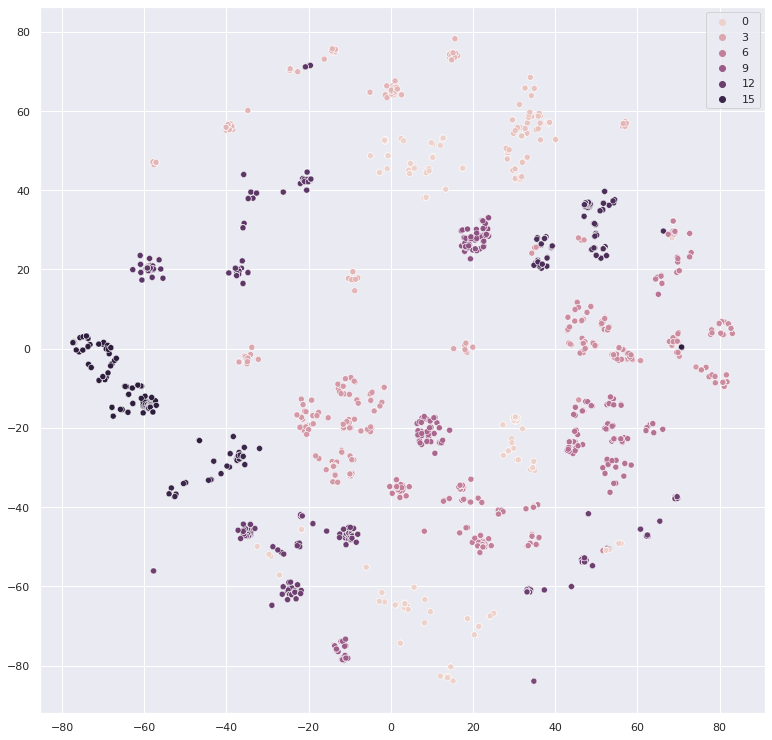

In [ ]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8add2d630>,
      dtype=object)

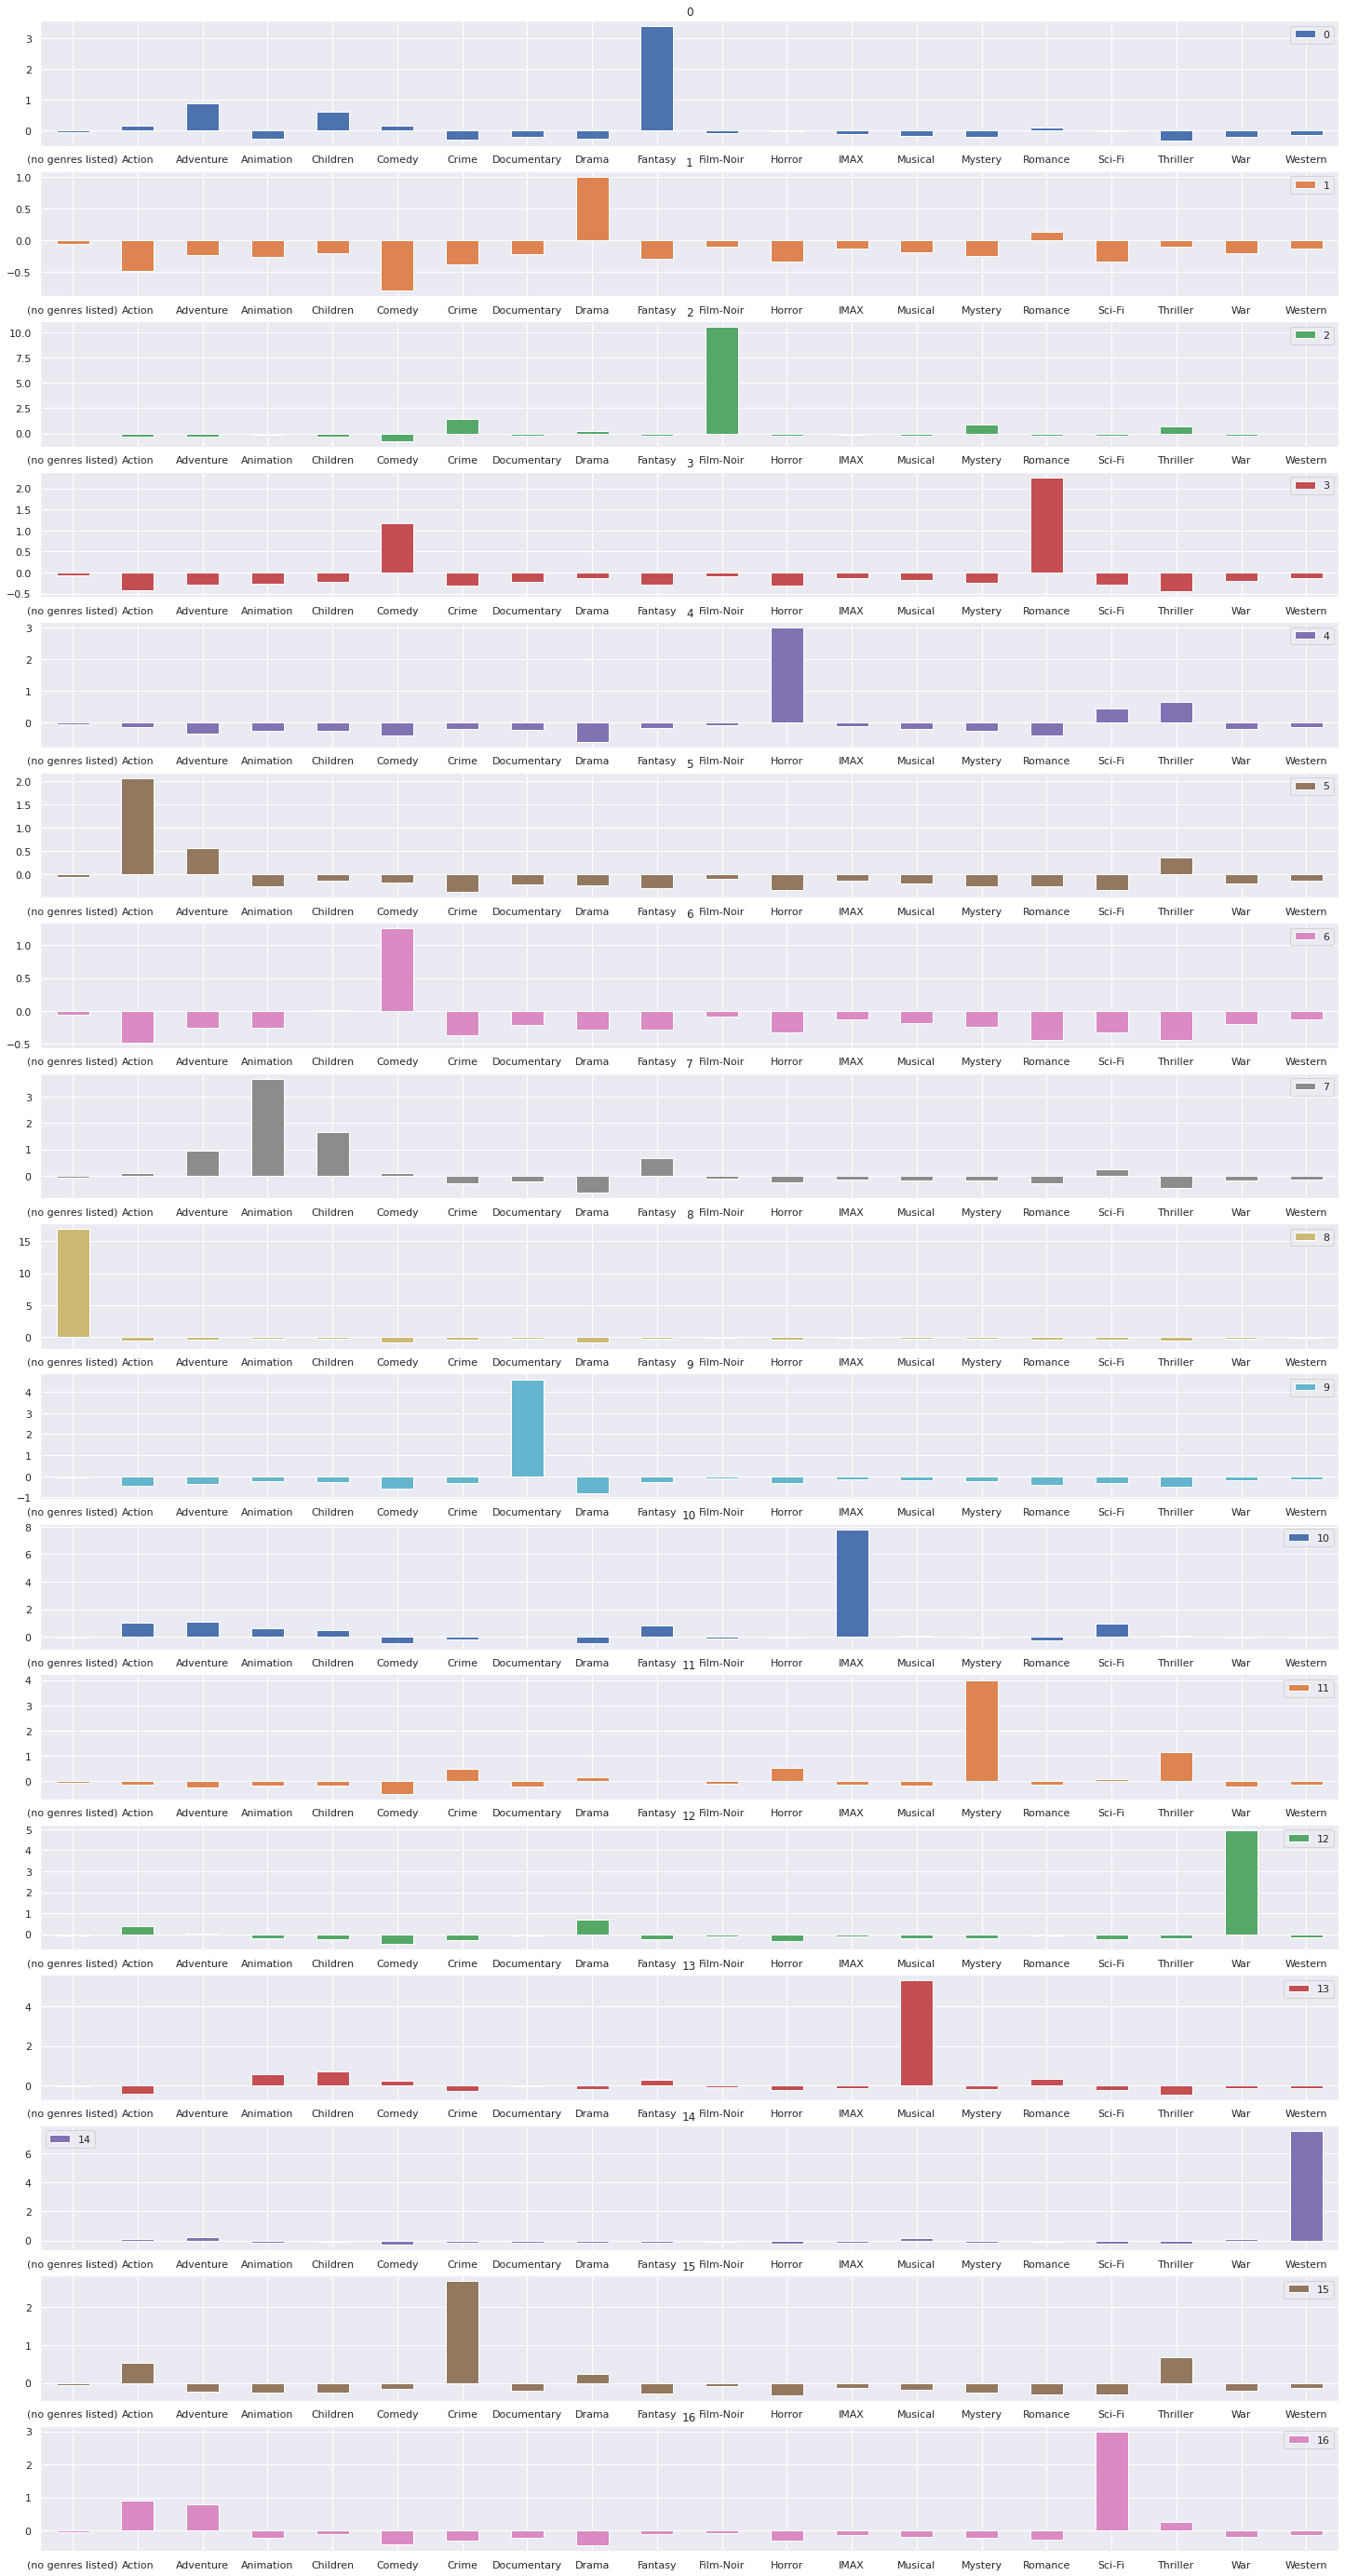

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, 
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [ ]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  6.        ,  2.52202695,  2.        ],
       [ 3.        , 17.        ,  2.72068658,  3.        ],
       [ 5.        , 18.        ,  3.07850225,  4.        ],
       [15.        , 19.        ,  3.47288653,  5.        ],
       [16.        , 20.        ,  3.55186349,  6.        ],
       [ 4.        , 21.        ,  3.92788559,  7.        ],
       [ 0.        , 22.        ,  4.16999103,  8.        ],
       [11.        , 23.        ,  4.72518777,  9.        ],
       [ 7.        , 24.        ,  4.77197776, 10.        ],
       [ 9.        , 25.        ,  5.19347018, 11.        ],
       [12.        , 26.        ,  5.25726249, 12.        ],
       [13.        , 27.        ,  5.78222175, 13.        ],
       [14.        , 28.        ,  7.87509831, 14.        ],
       [10.        , 29.        ,  8.28658526, 15.        ],
       [ 2.        , 30.        , 10.81606397, 16.        ],
       [ 8.        , 31.        , 17.07800151, 17.        ]])

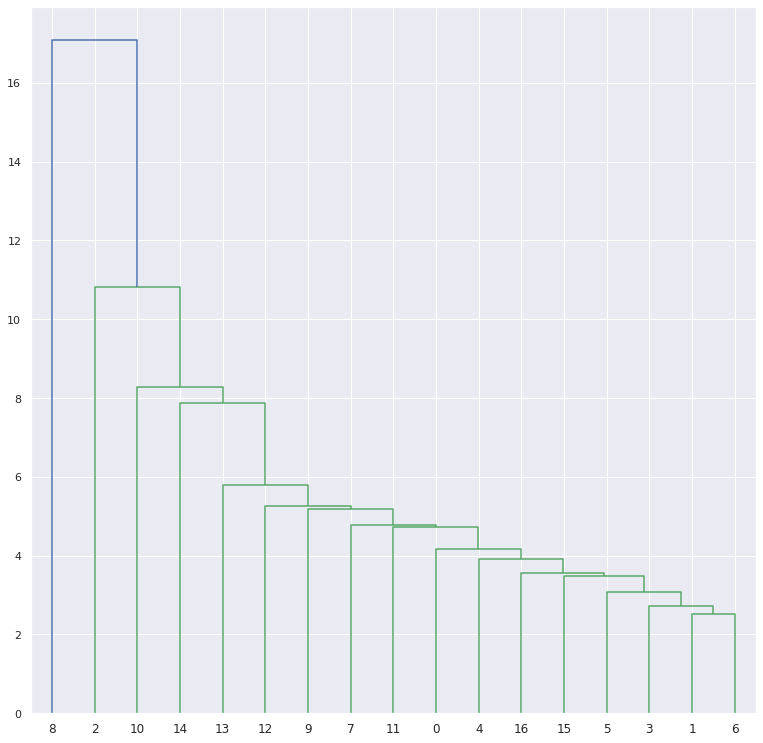

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)